<a href="https://colab.research.google.com/github/PatelHarshitt/ML2025/blob/main/kmeans_and_irisdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('iris.csv')

In [ ]:
data.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [ ]:
data.shape

(150, 6)

In [ ]:
features = data.drop(columns=['Id', 'Species'])
labels = data['Species']  # Actual class labels for homogeneity score


In [ ]:
data.shape

(150, 6)

In [ ]:
features.shape

(150, 4)

In [ ]:
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans

# Specify the number of clusters (3) and fit the data features
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)

In [ ]:
labels

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [ ]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


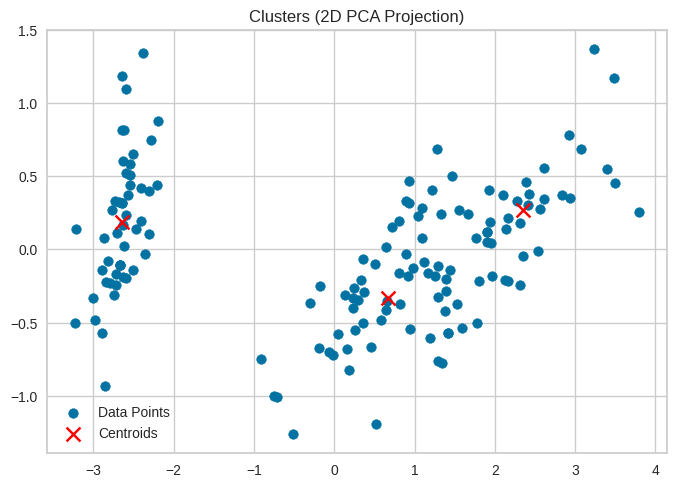

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features)
centers_2d = pca.transform(kmeans.cluster_centers_)

# Plot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Data Points')
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('Clusters (2D PCA Projection)')
plt.legend()
plt.show()


In [ ]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(features.iloc[:, 0], features.iloc[:, 1] ,features.iloc[:, 2], features.iloc[:, 3])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='o')
plt.title('Data points and cluster centroids')
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

In [ ]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(features, kmeans.labels_))

0.5509643746707443


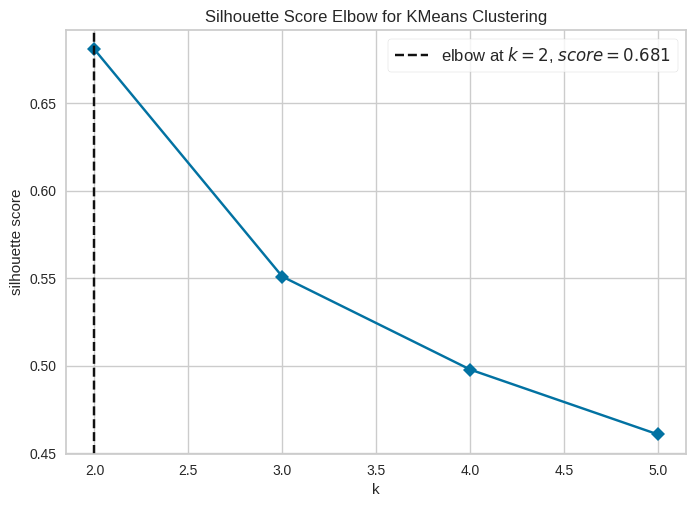

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(features)
visualizer.poof()

#NEW CODE FOR COMPLETE LAB 1 NIOW


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('iris.csv')  # Replace with actual file path if needed

# Extract features
X = df.iloc[:, 1:5].values  # SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
y_true = LabelEncoder().fit_transform(df['Species'])  # Convert species names to numbers


In [ ]:
homogeneity_scores = []
inertia_values = []

K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)

    if k >= 1:
        score = homogeneity_score(y_true, y_pred)
        homogeneity_scores.append(score)
        print(f"K = {k} → Homogeneity Score: {score:.4f}")


K = 1 → Homogeneity Score: 0.0000
K = 2 → Homogeneity Score: 0.5223
K = 3 → Homogeneity Score: 0.7364
K = 4 → Homogeneity Score: 0.7683
K = 5 → Homogeneity Score: 0.8239
K = 6 → Homogeneity Score: 0.8239
K = 7 → Homogeneity Score: 0.8319
K = 8 → Homogeneity Score: 0.9180
K = 9 → Homogeneity Score: 0.8971


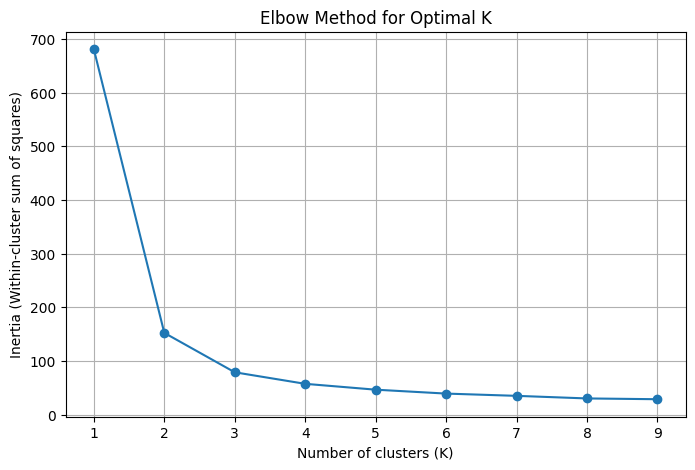

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()


here after k = 3 . we see less variation so k = 3 is suitable

#3rd time using silouhette method



In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

# Load data
df1 = pd.read_csv('iris.csv')  # Adjust path if necessary
X = df1.iloc[:, 1:5].values    # SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

silhouette_scores = []

# Try K from 2 to 9
K_range = range(3, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate silhouette score
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
    print(f"K = {k} → Silhouette Score: {score:.4f}")


K = 3 → Silhouette Score: 0.5510
K = 4 → Silhouette Score: 0.4974
K = 5 → Silhouette Score: 0.4885
K = 6 → Silhouette Score: 0.3634
K = 7 → Silhouette Score: 0.3595
K = 8 → Silhouette Score: 0.3427
K = 9 → Silhouette Score: 0.3126


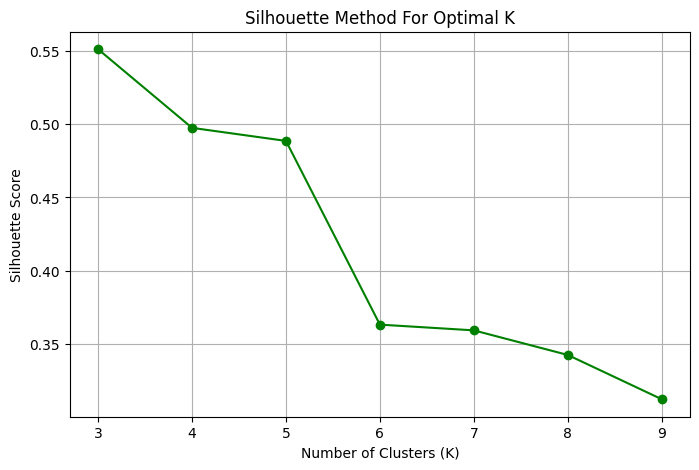

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Method For Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


k mean clustering using 3 clusters


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("iris.csv")  # Adjust path if needed

# Extract features (ignore Id and Species)
X = df.iloc[:, 1:5].values  # SepalLengthCm to PetalWidthCm

# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get labels and cluster centers
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster Centers:\n", centroids)


Cluster Centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


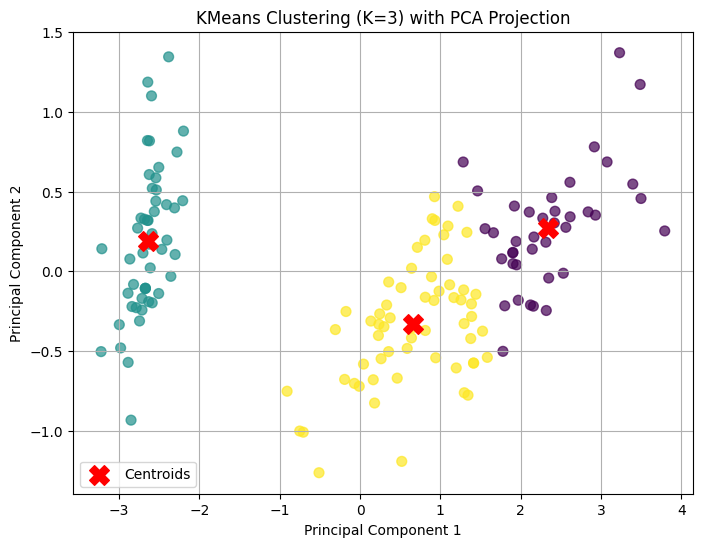

In [ ]:
# Reduce dimensions to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)

# Plot the clustered data
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("KMeans Clustering (K=3) with PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import homogeneity_score

y_true = LabelEncoder().fit_transform(df['Species'])
print("Homogeneity Score:", homogeneity_score(y_true, labels))


Homogeneity Score: 0.7364192881252849
